# Runge-Kutta methods

Runge-Kutta methods are the most commonly used approach to solving the initial value ODE:

\begin{align*}
u'(t) & = f(t,u) \\
u(0) & = u_0
\end{align*}


We have seen one example of a Runge-Kutta method in class:

\begin{align*}
Y_2 & = U^n + \frac{1}{2}kf(t_n, U^n) \\
U^{n+1} & = U^n + kf(t_n+k/2, Y_2)
\end{align*}
We saw that this method is 2nd order accurate.

It's called a two-stage method because we must evaluate $f$ twice per step.

Here's a 4-stage method:

\begin{align*}
Y_1 & = U^n \\
Y_2 & = U^n +\frac{k}{2}f(t_n,Y_1) \\
Y_3 & = U^n +\frac{k}{2}f(t_n+k/2,Y_2) \\
Y_4 & = U^n +kf(t_n+k/2,Y_3) \\
U^{n+1} & = U^n + \frac{k}{6} \left(f(t_n,Y_1) + 2f(t_n+k/2,Y_2) + 2f(t_n+k/2,Y_3) + f(t_n+k,Y_4) \right)
\end{align*}

This method costs twice as much as the second order method (per step) but is 4th-order accurate.  
Which method is better?

We can write any Runge-Kutta method this way:

\begin{align*}
Y_i & = U^n + k\sum_{j=1}^r a_{ij} f(Y_j,t_n+kc_j) & i=1,2,\dots,r \\
U^{n+1} & = U^n + k \sum_{j=1}^r b_j f(Y_j, t_n+kc_j).
\end{align*}

Here $r$ is the number of stages.

Notice that it's possible for earlier stages $Y_i$ to depend on later ones.  If the stages are coupled together in this way the method will be implicit.

It is customary to write these coefficients in a **Butcher table**:

$$
\begin{array}{c|c}
c & A \\ \hline
  & b^T
\end{array}
$$

In [1]:
from nodepy import rk
rk44 = rk.loadRKM('RK44')
print(rk44)

Classical RK4
The original four-stage, fourth-order method of Kutta
 0   |
 1/2 | 1/2
 1/2 |      1/2
 1   |           1
_____|____________________
     | 1/6  1/3  1/3  1/6


Here are the method and table together for comparison:

\begin{align*}
Y_1 & = U^n \\
Y_2 & = U^n +\frac{k}{2}f(t_n,Y_1) \\
Y_3 & = U^n +\frac{k}{2}f(t_n+k/2,Y_2) \\
Y_4 & = U^n +kf(t_n+k/2,Y_3) \\
U^{n+1} & = U^n + \frac{k}{6} \left(f(t_n,Y_1) + 2f(t_n+k/2,Y_2) + 2f(t_n+k/2,Y_3) + f(t_n+k,Y_4) \right)
\end{align*}

In [2]:
print(rk44)

Classical RK4
The original four-stage, fourth-order method of Kutta
 0   |
 1/2 | 1/2
 1/2 |      1/2
 1   |           1
_____|____________________
     | 1/6  1/3  1/3  1/6


Another example:

\begin{align*}
Y_1 & = U^n \\
Y_2 & = U^n + \frac{1}{2}kf(t_n, U^n) \\
U^{n+1} & = U^n + kf(t_n+k/2, Y_2)
\end{align*}

In [3]:
rk2 = rk.loadRKM('Mid22')
print(rk2)

Midpoint Runge-Kutta

 0   |
 1/2 | 1/2
_____|__________
     | 0    1


In this method, we see that $Y_2$ is an approximation of $u$ at time $t_n + k/2$.  That's why we take $c_2=1/2$, so that when we evaluate the derivative ($f$) at $Y_2$, we use the appropriate time value.  This suggests that in general we should have

$$
c_i = \sum_j a_{ij}.
$$

Let's apply a Runge-Kutta method to our favorite test problem:

$$
u'(t) = \lambda u(t).
$$

We have

\begin{align*}
    Y_i & = U^n + \lambda k \sum_j a_{ij} Y_j \\
    U^{n+1} & = U^n + \lambda k \sum_j b_j Y_j.
\end{align*}

We can rewrite the stage equations in vector form:

$$
Y = {\mathbb 1}U^n + z AY
$$

and solve for $Y$:

\begin{align*}
    (I-zA)Y & = {\mathbb 1}U^n \\ 
\end{align*}

$$
Y = (I-zA)^{-1}{\mathbb 1}U^n.
$$

Substituting this into the equation for $U^{n+1}$, we get

$$U^{n+1} = U^n + z b^T Y = (1+zb^T(I-zA)^{-1}{\mathbb 1})U^n = R(z)U^n.$$

Thus we have the stability function of a Runge-Kutta method:

$$
R(z) = 1+zb^T(I-zA)^{-1}{\mathbb 1}
$$

$$
R(z) = 1+zb^T(I-zA)^{-1}{\mathbb 1}
$$

What kind of function is this?

We have the Neumann series

$$
(I-zA)^{-1} = I + zA + z^2A^2 + \cdots.
$$

For explicit methods, $A$ is lower triangular, so $A^r=0$, which means

$$
(I-zA)^{-1} = I + zA + z^2A^2 + \cdots + z^{r-1} A^{r-1}
$$

So for explicit methods,

\begin{align*}
    R(z) & = 1+ zb^T(I + zA + \cdots + z^{r-1} A^{r-1}){\mathbb 1} \\
         & = 1 + zb^T{\mathbb 1} + z^2b^TA{\mathbb 1} + \cdots + z^r A^{r-1}{\mathbb 1}.
\end{align*}

$$U^{n+1} = R(z) U^n$$

\begin{align*}
    R(z) & = 1 + zb^T{\mathbb 1} + z^2b^TA{\mathbb 1} + \cdots + z^r A^{r-1}{\mathbb 1}.
\end{align*}

Since the true solution is

$$
u(t_n) = e^{\lambda t_n}u_0,
$$

we have
$$
u(t_{n+1}) = e^{\lambda(t_{n+1}-t_n)}u(t_n) = e^{\lambda k}u(t_n) = e^z u(t_n).
$$

We see that we must have
$$R(z) \approx e^z.$$

More specifically, comparing the series for $R(z)$ with the Maclaurin series for $e^z$, we get the **order conditions**:

\begin{align*}
    b^T{\mathbb 1} & = 1 & \text{(1st order)} \\
    b^T A {\mathbb 1} & = \frac{1}{2} & \text{(2nd order)} \\
    b^T A^2 {\mathbb 1} & = \frac{1}{6} & \text{(3rd order)}
\end{align*}

and so forth.

In [11]:
print(rk2.stability_function()[0])

     2
0.5 x + 1 x + 1


In [10]:
print(rk44.stability_function()[0])

         4          3       2
0.04167 x + 0.1667 x + 0.5 x + 1 x + 1


These conditions are necessary for consistency of a given order (for instance, a 3rd-order method must satisfy all 3 conditions above).  But they are not sufficient -- there are some additional conditions that must be satisfied.  For instance, a 3rd-order method must also satisfy

$$
    b^T c^2 = \frac{1}{3}.
$$

These additional order conditions can be derived using detailed Taylor expansions of the stages and the true solution.  This gets very messy and is tedious and error-prone.  Fortunately, these conditions have a 1-1 correspondence with **rooted trees**.

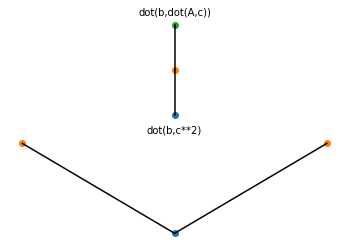

In [4]:
from nodepy import rt
rt.plot_all_trees(3,title=rk.elementary_weight_str);

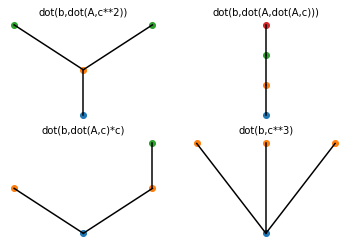

In [5]:
from nodepy import rt
rt.plot_all_trees(4,title=rk.elementary_weight_str);

How many conditions are there for each order?

In [6]:
total = 0
for j in range(1,6):
    n = len(rt.list_trees(j))
    total += n
    print("{:2}  {:3}  {:4}".format(j,n,total))

 1    1     1
 2    1     2
 3    2     4
 4    4     8
 5    9    17


How many conditions do you think there will be for order 14?

In [7]:
total = 0
for j in range(1,15):
    n = len(rt.recursiveVectors(j))+1
    total += n
    print("{:4}  {:5}  {:5}".format(j,n,total))

   1      1      1
   2      1      2
   3      2      4
   4      4      8
   5      9     17
   6     20     37
   7     48     85
   8    115    200
   9    286    486
  10    719   1205
  11   1842   3047
  12   4766   7813
  13  12486  20299
  14  32973  53272


An interesting question: what is the minimum number of "stages" required to achieve a given order of explicit Runge-Kutta method?

![](./RK-history.png)

For implicit methods, the picture is much simpler: with $r$ stages, you can create a method of order $2r$.  These methods are based on Gauss quadrature, and are very expensive since all the stages are coupled together.

Runge-Kutta methods are a powerful and convenient way to solve initial value problems, and are in extremely wide use.  Dozens, if not hundreds, of different methods have been developed for different purposes and used in every imaginable kind of application.

The theory of Runge-Kutta methods is surprisingly deep, with connections to pure mathematics (the methods themselves form a group under composition, and the order conditions are related to Hopf algebras).

Here's a fun little site I made showing information about some of them:
http://ketch.github.io/numipedia/